<a href="https://colab.research.google.com/github/saraizas/Awesome-People/blob/main/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fuel = pd.read_csv('/content/datathon/Unit.csv')

fuel.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/datathon/Unit.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

industry = pd.read_csv('/content/datathon/Industry.csv')
industry.columns

industry.head()


,Subpart Letter,Name of industry,Facility Type
0,C,Stationary Combustion,Direct Emitter
1,D,Electricity Generation,Direct Emitter
2,E,Adipic Acid Production,Direct Emitter
3,F,Aluminum Production,Direct Emitter
4,G,Ammonia Manufacturing,Direct Emitter


In [ ]:
unit = pd.read_csv('/content/datathon/Unit.csv')
unit.head()

,Facility.Id,FRS.Id,Facility.Name,City,State,Primary.NAICS.Code,Year,Industry.Type,Sector,Unit.Name,Unit.Type,Method,Max.Heat,CO2.emissions.non.biogenic.,Methane.emissions,Nitrous.Oxide.emissions,CO2.emissions.biogenic.
0,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec1,PRH (Process Heater),Tier1/2/3,7.4,176.7,0.0,0.0,0.0
1,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec2,PRH (Process Heater),Tier1/2/3,7.4,154.7,0.0,0.0,0.0
2,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,Heatec1,PRH (Process Heater),Tier1/2/3,7.4,84.4,0.0,0.0,0.0
3,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,Heatec2,PRH (Process Heater),Tier1/2/3,7.4,78.9,0.0,0.0,0.0
4,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2020,"C,D",Power Plants,Heatec1,PRH (Process Heater),Tier1/2/3,7.4,90.7,0.0,0.0,0.0


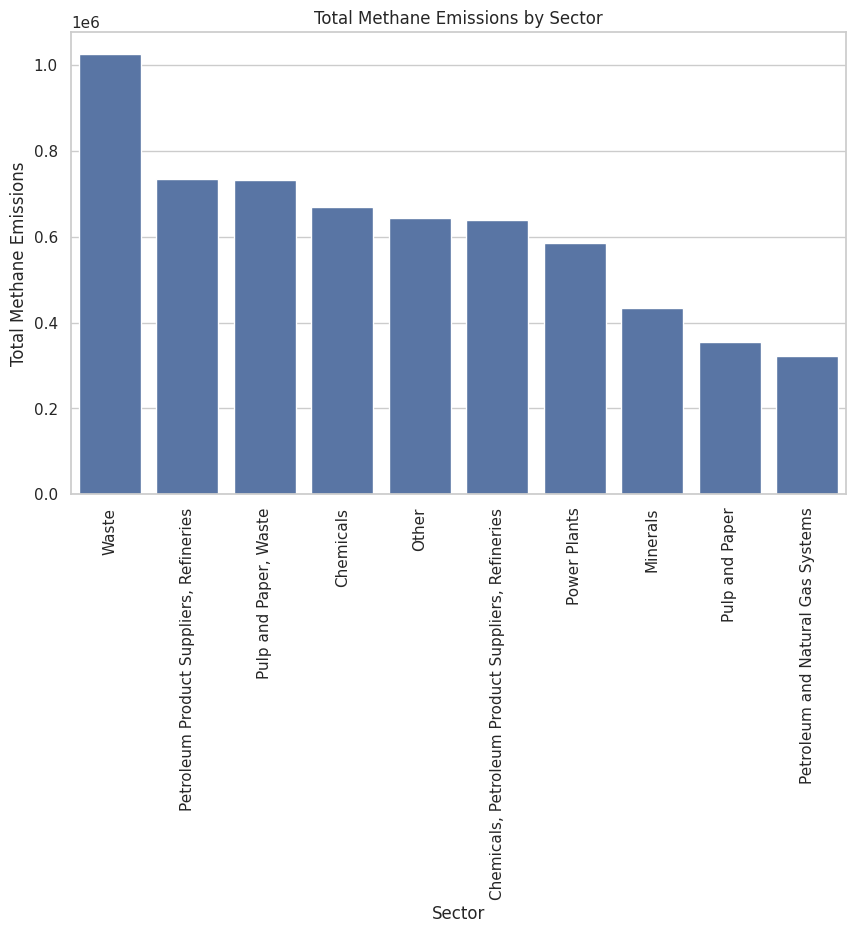

In [ ]:
# Group by 'Sector', sum 'Methane.emissions', and sort in descending order
grouped_data = fuel.groupby('Sector')['Methane.emissions'].sum().sort_values(ascending=False)
top_polluters = grouped_data.head(10)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_polluters.index, y=top_polluters.values)

# Set the title of the plot
plt.title('Total Methane Emissions by Sector')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Total Methane Emissions')

# Display the plot
plt.show()

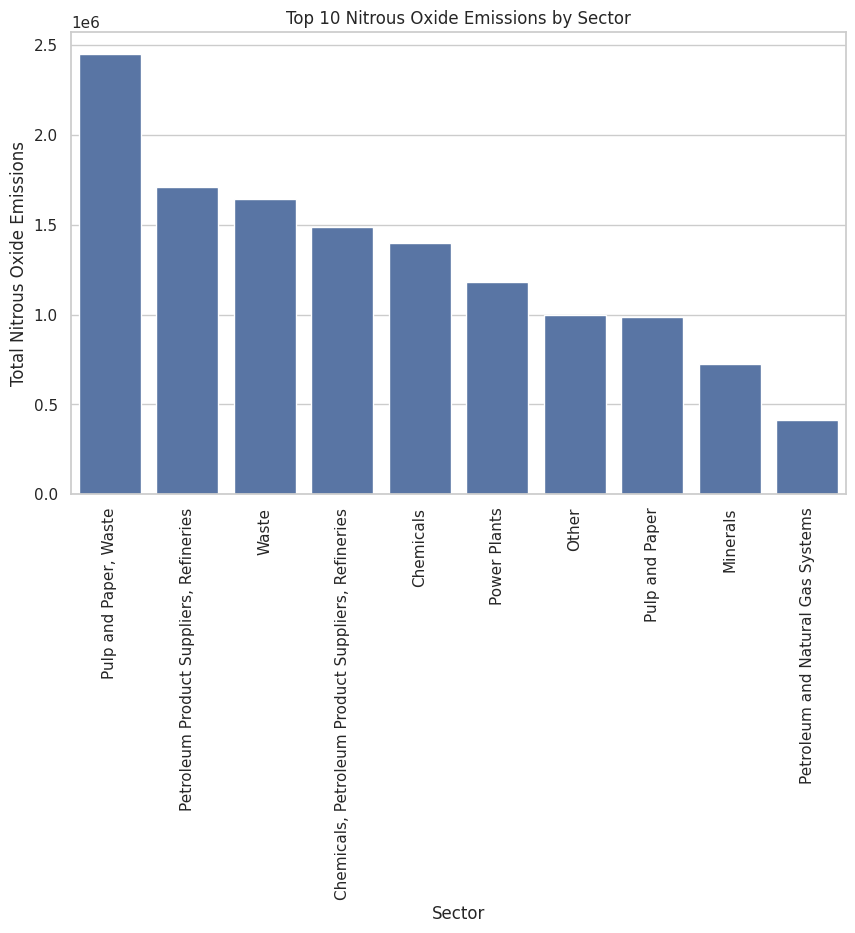

In [ ]:
# Group by 'Sector', sum 'Methane.emissions', and sort in descending order
grouped_data = fuel.groupby('Sector')['Nitrous.Oxide.emissions'].sum().sort_values(ascending=False)

# Get the top 10 highest polluters
top_oxide_polluters = grouped_data.head(10)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_oxide_polluters.index, y=top_oxide_polluters.values)

# Set the title of the plot
plt.title('Top 10 Nitrous Oxide Emissions by Sector')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Total Nitrous Oxide Emissions')

# Display the plot
plt.show()

In [ ]:

# Create a scatter plot of emissions by facility ID
top_10_facilities = fuel.groupby('Facility.Id')[['Nitrous.Oxide.emissions','Methane.emissions']].sum().sort_values(by='Methane.emissions', ascending=False).head(10)
print(top_10_facilities)




             Nitrous.Oxide.emissions  Methane.emissions
Facility.Id                                            
1006008                   224987.020          143783.00
1007542                   276555.324          123074.00
1006038                   140667.026           89915.50
1005911                   207185.096           87244.00
1007458                   196930.320           85268.75
1006560                   121855.180           73069.00
1007643                   147902.764           66056.75
1004314                   130505.524           57492.50
1003286                   130340.134           55758.75
1002389                   131305.356           55293.25


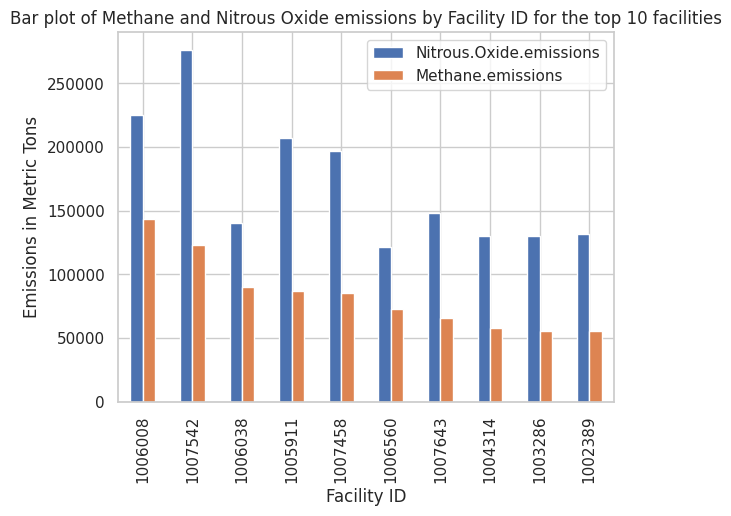

In [ ]:
top_10_facilities.plot(kind='bar', stacked=False)

# Set the title and labels of the plot
plt.title('Bar plot of Methane and Nitrous Oxide emissions by Facility ID for the top 10 facilities')
plt.xlabel('Facility ID')
plt.ylabel('Emissions in Metric Tons')

# Display the plot
plt.show()

In [ ]:
fuel[['Methane.emissions', 'Nitrous.Oxide.emissions']].describe().round(1)

,Methane.emissions,Nitrous.Oxide.emissions
count,174528.0,174528.0
mean,43.2,90.9
std,209.3,445.0
min,0.0,0.0
25%,0.0,0.0
50%,1.2,1.8
75%,17.8,24.7
max,7998.5,14602.0


In [ ]:
top_10_states = fuel.groupby('State')[['Nitrous.Oxide.emissions','Methane.emissions' ]].sum().sort_values(by='Methane.emissions', ascending=False).head(10)
print(top_10_states)

NameError: name 'fuel' is not defined

In [ ]:
top_10_cities = fuel.groupby('City')[['Nitrous.Oxide.emissions','Methane.emissions' ]].sum().sort_values(by='Methane.emissions', ascending=False).head(10)
print(top_10_cities)